## Домашнее задание № 1 (Макс. 10 баллов)

В данной домашней работе мы познакомимся на практике с пройденными в рамках 2 и 3 лекции темами, включающими в себя статистику, проверку гипотез и A/B тестирование.

### Задача 1 (2 балла)

**(1 Балл)** Рассчитайте среднее, стандартное отклонение и медиану по 1000 случайных выборок, порождённых нормальным распределением с $\mu = 5$ и $\sigma^2 = 4$, состоящих из 100 элементов. Постройте распределение полученных метрик.

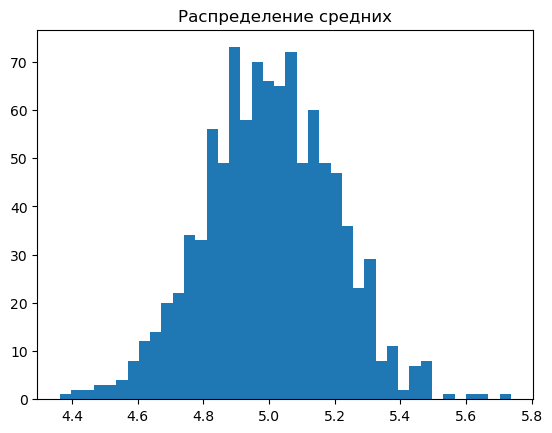

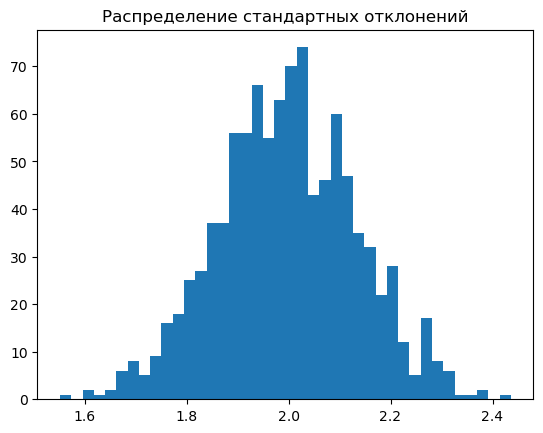

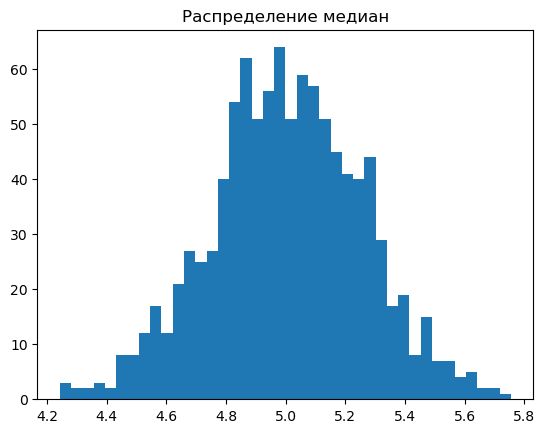

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm


def calc_stat_random_sample(mu=5, sigma=2, size=100): # так как sigma^2 = 4, поставил sigma = 2
    random_sample = sps.norm.rvs(loc=mu, scale=sigma, size=size)
    mean = random_sample.mean()
    std = random_sample.std(ddof=1)
    median = np.median(random_sample)
    return(mean, std, median)


n_samples = 1000
means = np.zeros(1000)
stds = np.zeros(1000)
medians = np.zeros(1000)
for i in range(n_samples):
    mean, std, median = calc_stat_random_sample()
    means[i] = mean
    medians[i] = median
    stds[i] = std

plt.figure()
plt.hist(means, bins = 40)
plt.title('Распределение средних')
plt.show()

plt.figure()
plt.hist(stds, bins = 40)
plt.title('Распределение стандартных отклонений')
plt.show()

plt.figure()
plt.hist(medians, bins = 40)
plt.title('Распределение медиан')
plt.show()

**(1 Балл)** Какому распределению принадлежит распределение средних? Почему?

Нормальному по ЦПТ: при достаточно большом размере выборки распределение выборочного среднего независимых одинаково распределённых случайных величин с конечной дисперсией стремится к нормальному, независимо от формы исходного распределения.

### Задача 2 (2 балла):

Оцените значение $\hat{\mu}$ параметра $\mu$ **(1 балл)** для нормального распределения $\mathscr{N}(\mu,1)$ используя метод максимального правдоподобия.

Справка: функция плотности распределения для нормального распределения имеет вид:
$$
    f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{e}^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

Функция правдоподобия (при $\sigma^2 = 1$):
$$
L(\mu)=\prod_{i=1}^n f(x_i\mid \mu)
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{(x_i-\mu)^2}{2}\right).
$$
Её логарифм:
$$
\ell(\mu)=\ln L(\mu)
= \ln\left[\left(\frac{1}{\sqrt{2\pi}}\right)^n\right]
-\frac{1}{2}\sum_{i=1}^n (x_i-\mu)^2 = -\frac{n}{2}\ln(2\pi) -\frac{1}{2}\sum_{i=1}^n (x_i-\mu)^2.
$$

Дифференцируем:

$$
\frac{d}{d\mu}\ell(\mu)
= -\frac{1}{2}\sum_{i=1}^n \frac{d}{d\mu}(x_i-\mu)^2
= -\frac{1}{2}\sum_{i=1}^n \left[-2(x_i-\mu)\right]
= \sum_{i=1}^n (x_i-\mu).
$$

Ищем экстремум:
$$
\sum_{i=1}^n (x_i-\mu)=0.
$$

$$
\sum_{i=1}^n x_i - n\mu = 0
$$
, откуда
$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i = \bar{x}
$$

Сгенерируйте 1000 выборок размером 1000 наблюдений из нормального распределения с $\mu = 5, \sigma^2 = 1$, постройте распределение разности $\mu - \hat{\mu}$ и найдите среднее этой разности в зависимости от числа выборок **(1 балл)**.

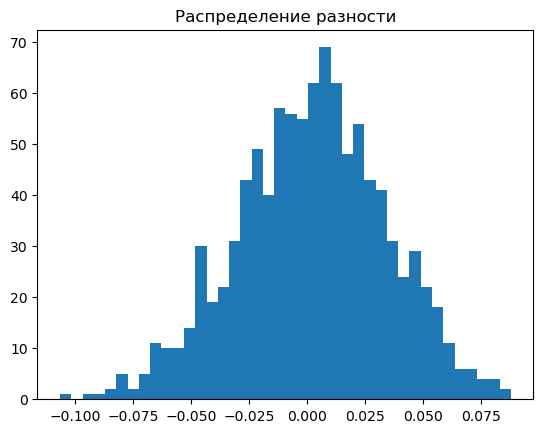

In [3]:
# Место для вашего кода и картинок
n_samples = 1000
diffs = np.zeros(1000)
for i in range(n_samples):
    mean, std, median = calc_stat_random_sample(mu=5, sigma=1, size=1000)
    diffs[i] = 5 - mean

plt.figure()
plt.hist(diffs, bins = 40)
plt.title('Распределение разности')
plt.show()

In [4]:
print("Среднее разности:", diffs.mean())

Среднее разности: 0.001937407296214361


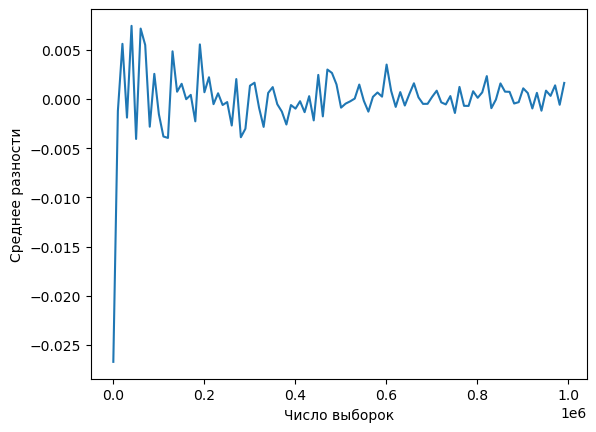

In [5]:
n_abs = np.arange(1000,1000000,10000)
means = []
for n in n_abs:
    means.append(5 - sps.norm.rvs(loc=5, scale=1, size=n).mean())

plt.plot(n_abs, means)
plt.xlabel('Число выборок')
plt.ylabel('Среднее разности')
plt.show()

### Задача 3 (2 балла)

**(1 балл)** Пусть известно, что выборка в n наблюдений порождена распределением Бернулли ~Bernoulli(p), пусть среднее значение по выборке равно $\hat{p}$. Постройте формулу 95% доверительного интервал для среднего

*Решение:* По ЦПТ среднее будет распределено нормально, дисперсия случайной величины будет $\hat{p} \cdot (1 - \hat{p})$ следовательно можем просто накатить формулку:
$$ \hat{p} \pm 1.96 \sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{n}}$$

**(1 балл)** Постройте 95% доверительный интервал на среднее в представленной выборке, используя бутстрап и сравните с теоретическим значением

In [6]:
X = sps.bernoulli.rvs(0.2, size = 10000, random_state=42)
n = len(X)
pav = X.mean()

se = np.sqrt(pav * (1 - pav) / n)

di_left = pav - 1.96 * se
di_right = pav + 1.96 * se

print("среднее по выборке =", pav)
print("95% доверительный интервал теоретический =", (di_left, di_right))

p_hat = 0.1962
95% CI (theory) = (np.float64(0.18841641676799176), np.float64(0.20398358323200827))


In [14]:
B = 5000
boot_means = np.zeros(B)

for b in range(B):
    X_boot = np.random.choice(X, size=n, replace=True)
    boot_means[b] = X_boot.mean()

di_boot = np.quantile(boot_means, [0.025, 0.975])
print("среднее по выборке =", pav)
print("95% доверительный интервал bootstrap =", tuple(di_boot))

среднее по выборке = 0.1962
95% доверительный интервал bootstrap = (np.float64(0.1883), np.float64(0.204))


### Задача 4 (4 балла)

Основным критерием для тестирования гипотезы о равенстве средних является t-test. Он строится на том, что по ЦПТ практически для любой случайной величины средние будут распределены нормально. 

В учебниках по статистике доказывается, что в силу этого для двух выборок, порождённых одинаково распределёнными независимыми случайными величинами с равным средним мы имеем асимпототику для выборочной t-статистики
$$
    T = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s_x^2}{n_1} + \frac{s_y^2}{n_2}}} \rightarrow t_{n_1 + n_2 - 2},
$$
где $\bar{x}, \bar{y}$ -- выборочные средние в выборках, $s_x^2, s_y^2$ -- выборочные дисперсии, $n_1, n_2$ -- размеры выборок, а $t_{n_1 + n_2 - 2}$ -- распределение Стьюдента с $n_1 + n_2 - 2$ степенями свободы.

**(1 балл)** Постройте плотность распределения Стьюдента с 1, 5, 10, 100 и 1000 степеней свободы, а также плотность стандартного нормального распределения

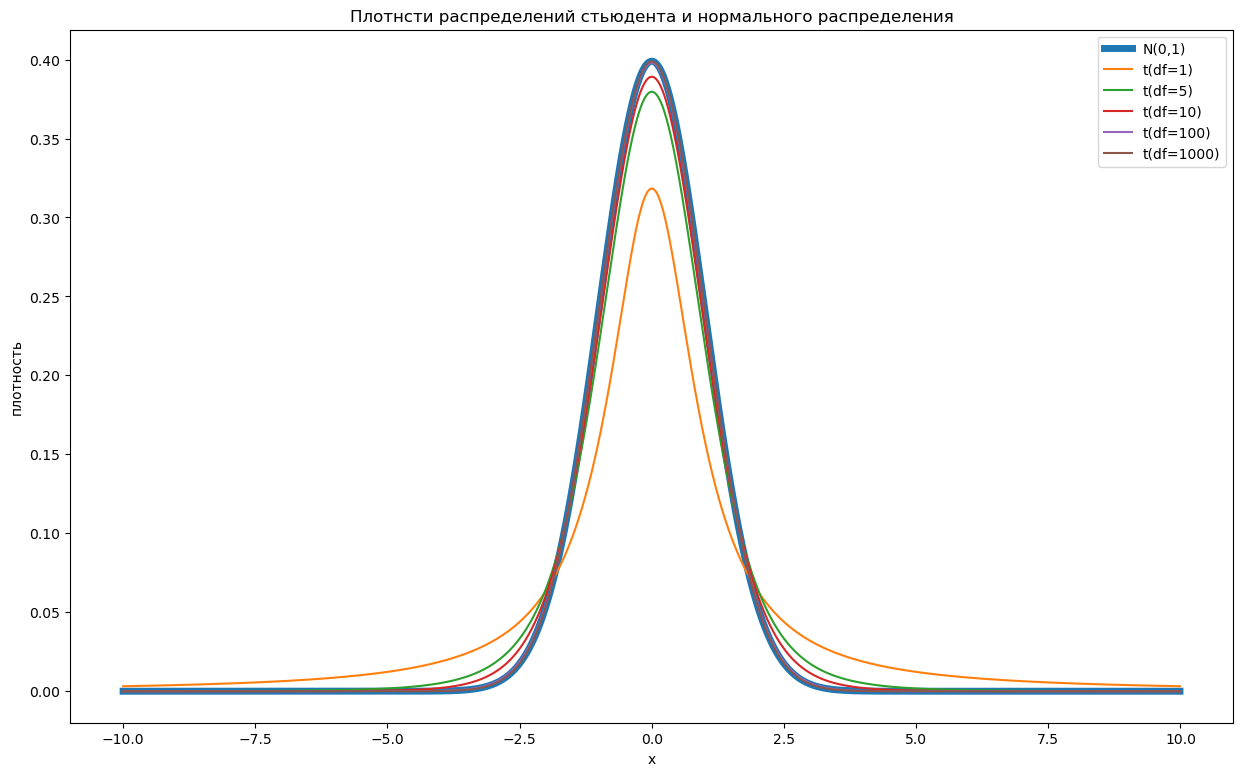

In [88]:
grid = np.arange(-10,10,0.01)

freedom_degrees = [1,5,10,100,1000]

# Место для вашего кода и картинок
plt.figure(figsize=(15, 9))
plt.plot(grid, sps.norm.pdf(grid), label='N(0,1)', linewidth=5)

for nu in freedom_degrees:
    plt.plot(grid, sps.t.pdf(grid, df=nu), label=f't(df={nu})')

plt.legend()
plt.title('Плотнсти распределений стьюдента и нормального распределения')
plt.xlabel('х')
plt.ylabel('плотность')
plt.show()

**(1 балл)** Пусть нам необходимо запустить A/B тест: в первой группе мы оставляем кнопку в банковском приложении в сером цвете, во втором -- красим её в жёлтый. Всего у нас в месяц в приложение заходит 1000 различных клиентов. Базовая конверсия в нажатие кнопки сейчас составляет 0.2. Бизнес постановил, что MDE = 5%, то есть значимым будет считаться изменение, при котором конверсия будет больше 0.21 или меньше 0.19. Хватит ли нам данных, чтобы замерить эффект за один месяц при уровне значимости $\alpha = 0.05$, если мы планируем поделить выборку пополам на тест и контроль?

In [89]:
# Место для вашего кода
N = 1000
n1 = n2 = N // 2
p0 = 0.20
p1 = 0.21
alpha = 0.05

z_crit = sps.norm.ppf(1 - alpha / 2)
diff = p1 - p0
se = np.sqrt(p0 * (1 - p0) / n1 + p1 * (1 - p1) / n2)
z_mde = diff / se

print("n1 = n2 = ", n1)
print("MDE = ", diff)
print("SE = ", se)
print("z_crit = ", z_crit)
print("z for MDE = ", z_mde)

n1 = n2 =  500
MDE =  0.009999999999999981
SE =  0.025530374066981474
z_crit =  1.959963984540054
z for MDE =  0.39169030480180145


Так как `z_mde < 1.96`, то при размере выборки 500 пользователей в каждой группе минимально значимый эффект не приводит к статистически значимому различию при уровне значимости 0.05. ИЁмеющихся данных за один месяц недостаточно для обнаружения такого эффекта.

**(1 балл)** Мы провели тест и получили следующие результаты:

In [90]:
X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000, random_state=42), sps.bernoulli.rvs(0.21, size = 1000, random_state=42)


Можем ли мы утверждать на уровне значимости $\alpha = 0.05$, что эффект имел место быть?

In [91]:
# Место для вашего кода
t_stat, p_value = sps.ttest_ind(X_1, X_2, equal_var=False)
print("средние:", X_1.mean(), X_2.mean())
print("t = ", t_stat, "p-value = ", p_value)

средние: 0.199 0.211
t =  -0.6644104722002683 p-value =  0.5065043374621505


p-value превышает уровень значимости 0.05, поэтому нулевая гипотеза о равенстве средних не отклоняется.

**(1 балл)** 

Что будет, если мы проведём 1000 таких тестов, "отпустив" random_state?

В какой доле случаев мы не задетектируем это существующее различие? Чему будет равна $\beta$?

In [92]:
# Под "отпущенным" random_state понимается None
# X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.21, size = 1000)

# Место для кода
alpha = 0.05
N = 1000
c = 0

for i in range(N):
    X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.21, size = 1000)
    t_stat, p_value = sps.ttest_ind(X_1, X_2, equal_var=False)
    if p_value >= alpha:
        c += 1
beta = c / N

print("бета = доля случаев, когда эффект НЕ задетектирован =", beta)

бета = доля случаев, когда эффект НЕ задетектирован = 0.909


Высока вероятность ошибки II рода при данном размере выборки.

А если различий не будет (при проведении 1000 A/A-тестов)? Как будет распределено p-value в этом случае?

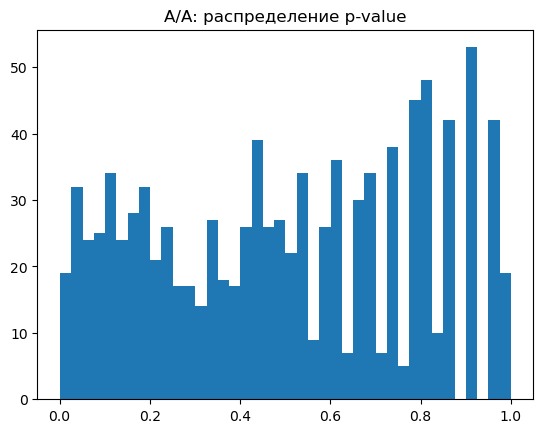

In [96]:
# Под A/A тестом имеем в виду: X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.2, size = 1000)

# Место для кода
pvals = np.zeros(N)

for i in range(N):
    X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.2, size = 1000)
    t_stat, p_value = sps.ttest_ind(X_1, X_2, equal_var=False)
    pvals[i] = p_value

plt.figure()
plt.hist(pvals, bins=40)
plt.title('A/A: распределение p-value')
plt.show()

При проведении 1000 A/A тестов (при отсутствии реального эффекта) распределение p-value оказывается близким к равномерному